### Data Pre-processing

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import random
import pickle
import gc
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
playlist_df = pd.read_csv('PlayList.csv')
playerTrackData_df = pd.read_csv('PlayerTrackData.csv')
injuryRecord_df = pd.read_csv('InjuryRecord.csv')

In [4]:
injury_playkey_list = list(injuryRecord_df.PlayKey.values)
inj_PlayerKey_list = list(injuryRecord_df.PlayerKey.values)

In [5]:
playerTrackData_df['PlayerKey'] = playerTrackData_df['PlayKey'].apply(lambda x: int(x.split('-')[0]))

In [6]:
target_track_df = playerTrackData_df[playerTrackData_df['PlayerKey'].isin(inj_PlayerKey_list)]

In [7]:
body_part_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.BodyPart))
surface_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.Surface))
DM_M1_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M1))
DM_M7_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M7))
DM_M28_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M28))
DM_M42_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M42))

In [9]:
target_track_df['BodyPart'] = target_track_df['PlayKey'].apply(lambda x: body_part_dict[x] if x in body_part_dict else None)
target_track_df['Surface'] = target_track_df['PlayKey'].apply(lambda x: surface_dict[x] if x in surface_dict else None)
target_track_df['DM_M1'] = target_track_df['PlayKey'].apply(lambda x: DM_M1_dict[x] if x in DM_M1_dict else None)
target_track_df['DM_M7'] = target_track_df['PlayKey'].apply(lambda x: DM_M7_dict[x] if x in DM_M7_dict else None)
target_track_df['DM_M28'] = target_track_df['PlayKey'].apply(lambda x: DM_M28_dict[x] if x in DM_M28_dict else None)
target_track_df['DM_M42'] = target_track_df['PlayKey'].apply(lambda x: DM_M42_dict[x] if x in DM_M42_dict else None)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [10]:
RosterPosition_dict = dict(zip(playlist_df.PlayKey, playlist_df.RosterPosition))
PlayerDay_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerDay))
StadiumType_dict = dict(zip(playlist_df.PlayKey, playlist_df.StadiumType))
FieldType_dict = dict(zip(playlist_df.PlayKey, playlist_df.FieldType))
Temperature_dict = dict(zip(playlist_df.PlayKey, playlist_df.Temperature))
Weather_dict = dict(zip(playlist_df.PlayKey, playlist_df.Weather))
PlayType_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayType))
Position_dict = dict(zip(playlist_df.PlayKey, playlist_df.Position))
PositionGroup_dict = dict(zip(playlist_df.PlayKey, playlist_df.PositionGroup))
PlayerGame_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerGame))
PlayerGamePlay_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerGamePlay))

In [11]:
target_track_df['RosterPosition'] = target_track_df['PlayKey'].apply(lambda x: RosterPosition_dict[x])
target_track_df['PlayerDay'] = target_track_df['PlayKey'].apply(lambda x: PlayerDay_dict[x])
target_track_df['StadiumType'] = target_track_df['PlayKey'].apply(lambda x: StadiumType_dict[x])
target_track_df['FieldType'] = target_track_df['PlayKey'].apply(lambda x: FieldType_dict[x])
target_track_df['Temperature'] = target_track_df['PlayKey'].apply(lambda x: Temperature_dict[x])
target_track_df['Weather'] = target_track_df['PlayKey'].apply(lambda x: Weather_dict[x])
target_track_df['PlayType'] = target_track_df['PlayKey'].apply(lambda x: PlayType_dict[x])
target_track_df['Position'] = target_track_df['PlayKey'].apply(lambda x: Position_dict[x])
target_track_df['PositionGroup'] = target_track_df['PlayKey'].apply(lambda x: PositionGroup_dict[x])
target_track_df['PlayerGame'] = target_track_df['PlayKey'].apply(lambda x: PlayerGame_dict[x])
target_track_df['PlayerGamePlay'] = target_track_df['PlayKey'].apply(lambda x: PlayerGamePlay_dict[x])

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [12]:
tmp1 = target_track_df.groupby('PlayerKey')['PlayerGame'].max()
max_game_id_dict = dict(zip(tmp1.index, tmp1.values))
target_track_df['max_game_id'] = target_track_df['PlayerKey'].apply(lambda x: max_game_id_dict[x])

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
tmp2 = target_track_df.groupby('PlayerKey')['PlayerGamePlay'].max()
max_play_id_dict = dict(zip(tmp2.index, tmp2.values))
target_track_df['max_play_id'] = target_track_df['PlayerKey'].apply(lambda x: max_play_id_dict[x])

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
target_track_df['if_max_play_id'] = (target_track_df['PlayerGamePlay'] == target_track_df['max_play_id'])
target_track_df['if_max_play_id'] = target_track_df['if_max_play_id'].astype(str)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
target_track_df['if_max_game_id'] = (target_track_df['PlayerKey'] == target_track_df['max_game_id'])
target_track_df['if_max_game_id'] = target_track_df['if_max_game_id'].astype(str)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
target_track_df['speed'] = target_track_df['dis'] / target_track_df['time']
target_track_df['angle'] = target_track_df['o'] - target_track_df['dir']

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
target_track_df.columns

Index(['PlayKey', 'time', 'event', 'x', 'y', 'dir', 'dis', 'o', 's',
       'PlayerKey', 'BodyPart', 'Surface', 'DM_M1', 'DM_M7', 'DM_M28',
       'DM_M42', 'RosterPosition', 'PlayerDay', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'Position', 'PositionGroup',
       'PlayerGame', 'PlayerGamePlay', 'max_game_id', 'max_play_id',
       'if_max_play_id', 'if_max_game_id', 'speed', 'angle'],
      dtype='object')

In [18]:
grouped_max = target_track_df[['PlayKey','time', 'dir', 'dis', 'o', 's', 'speed', 'angle']].groupby(by=['PlayKey']).max()
grouped_average = target_track_df[['PlayKey','time', 'dir', 'dis', 'o', 's', 'speed', 'angle']].groupby(by=['PlayKey']).mean()

In [45]:
train_df = pd.DataFrame()
train_df['PlayKey'] = target_track_df.PlayKey.value_counts().index

train_df = train_df.merge(grouped_max.reset_index(), on=['PlayKey'])
train_df = train_df.merge(grouped_average.reset_index(), on=['PlayKey'], suffixes=('_max', '_avg'))

train_df['if_injury'] = train_df['PlayKey'].apply(lambda x: 1 if x in injury_playkey_list else 0)

In [46]:
RosterPosition_dict = dict(zip(playlist_df.PlayKey, playlist_df.RosterPosition))
PlayerDay_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerDay))
StadiumType_dict = dict(zip(playlist_df.PlayKey, playlist_df.StadiumType))
FieldType_dict = dict(zip(playlist_df.PlayKey, playlist_df.FieldType))
Temperature_dict = dict(zip(playlist_df.PlayKey, playlist_df.Temperature))
Weather_dict = dict(zip(playlist_df.PlayKey, playlist_df.Weather))
PlayType_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayType))
Position_dict = dict(zip(playlist_df.PlayKey, playlist_df.Position))
PositionGroup_dict = dict(zip(playlist_df.PlayKey, playlist_df.PositionGroup))
PlayerGame_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerGame))
PlayerGamePlay_dict = dict(zip(playlist_df.PlayKey, playlist_df.PlayerGamePlay))

In [47]:
train_df['RosterPosition'] = train_df['PlayKey'].apply(lambda x: RosterPosition_dict[x])
train_df['PlayerDay'] = train_df['PlayKey'].apply(lambda x: PlayerDay_dict[x])
train_df['StadiumType'] = train_df['PlayKey'].apply(lambda x: StadiumType_dict[x])
train_df['FieldType'] = train_df['PlayKey'].apply(lambda x: FieldType_dict[x])
train_df['Temperature'] = train_df['PlayKey'].apply(lambda x: Temperature_dict[x])
train_df['Weather'] = train_df['PlayKey'].apply(lambda x: Weather_dict[x])
train_df['PlayType'] = train_df['PlayKey'].apply(lambda x: PlayType_dict[x])
train_df['Position'] = train_df['PlayKey'].apply(lambda x: Position_dict[x])
train_df['PositionGroup'] = train_df['PlayKey'].apply(lambda x: PositionGroup_dict[x])
train_df['PlayerGame'] = train_df['PlayKey'].apply(lambda x: PlayerGame_dict[x])
train_df['PlayerGamePlay'] = train_df['PlayKey'].apply(lambda x: PlayerGamePlay_dict[x])

In [48]:
body_part_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.BodyPart))
DM_M1_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M1))
DM_M7_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M7))
DM_M28_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M28))
DM_M42_dict = dict(zip(injuryRecord_df.PlayKey, injuryRecord_df.DM_M42))

In [49]:
train_df['BodyPart'] = train_df['PlayKey'].apply(lambda x: body_part_dict[x] if x in body_part_dict else 'nan')
train_df['DM_M1'] = train_df['PlayKey'].apply(lambda x: DM_M1_dict[x] if x in DM_M1_dict else 0)
train_df['DM_M7'] = train_df['PlayKey'].apply(lambda x: DM_M7_dict[x] if x in DM_M7_dict else 0)
train_df['DM_M28'] = train_df['PlayKey'].apply(lambda x: DM_M28_dict[x] if x in DM_M28_dict else 0)
train_df['DM_M42'] = train_df['PlayKey'].apply(lambda x: DM_M42_dict[x] if x in DM_M42_dict else 0)

In [50]:
train_df.columns

Index(['PlayKey', 'time_max', 'dir_max', 'dis_max', 'o_max', 's_max',
       'speed_max', 'angle_max', 'time_avg', 'dir_avg', 'dis_avg', 'o_avg',
       's_avg', 'speed_avg', 'angle_avg', 'if_injury', 'RosterPosition',
       'PlayerDay', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'Position', 'PositionGroup', 'PlayerGame', 'PlayerGamePlay',
       'BodyPart', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

### tf-idf model

In [52]:
target_track_df['event'] = target_track_df['event'].astype(str)
cc = target_track_df.groupby('PlayKey')['event'].apply(list)
session_dict = dict(zip(cc.index, cc.values))
playkey_session_df = pd.DataFrame()
playkey_session_df['PlayKey'] = pd.Series(list(session_dict.keys())).values
playkey_session_df['session'] = pd.Series(list(session_dict.values())).values
playkey_session_df['session'] = playkey_session_df['session'].apply(lambda x : list(filter(('nan').__ne__, x)))
playkey_session_df.head()

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PlayKey,session
0,31070-1-1,"[punt_play, line_set, ball_snap, punt, punt_la..."
1,31070-1-10,"[huddle_start_offense, huddle_break_offense, l..."
2,31070-1-11,"[huddle_start_offense, huddle_break_offense, l..."
3,31070-1-12,"[huddle_start_offense, huddle_break_offense, l..."
4,31070-1-13,"[huddle_break_offense, line_set, shift, ball_s..."


In [141]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
playkey_session_df_oh = playkey_session_df.join(pd.DataFrame(mlb.fit_transform(playkey_session_df.pop('session')),
                          columns=mlb.classes_,
                          index=playkey_session_df.index))

In [142]:
playkey_session_df_oh.loc['Total',:]= playkey_session_df_oh.sum(axis=0)
wordFreqDict = playkey_session_df_oh.tail(1).to_dict('records')[0]
del wordFreqDict['PlayKey']

In [143]:
wordFreq_df = pd.DataFrame()
wordFreq_df['word'] = pd.Series(list(wordFreqDict.keys())).values
wordFreq_df['freq'] = pd.Series(list(wordFreqDict.values())).values
wordFreq_df = wordFreq_df.sort_values('freq', ascending=False)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


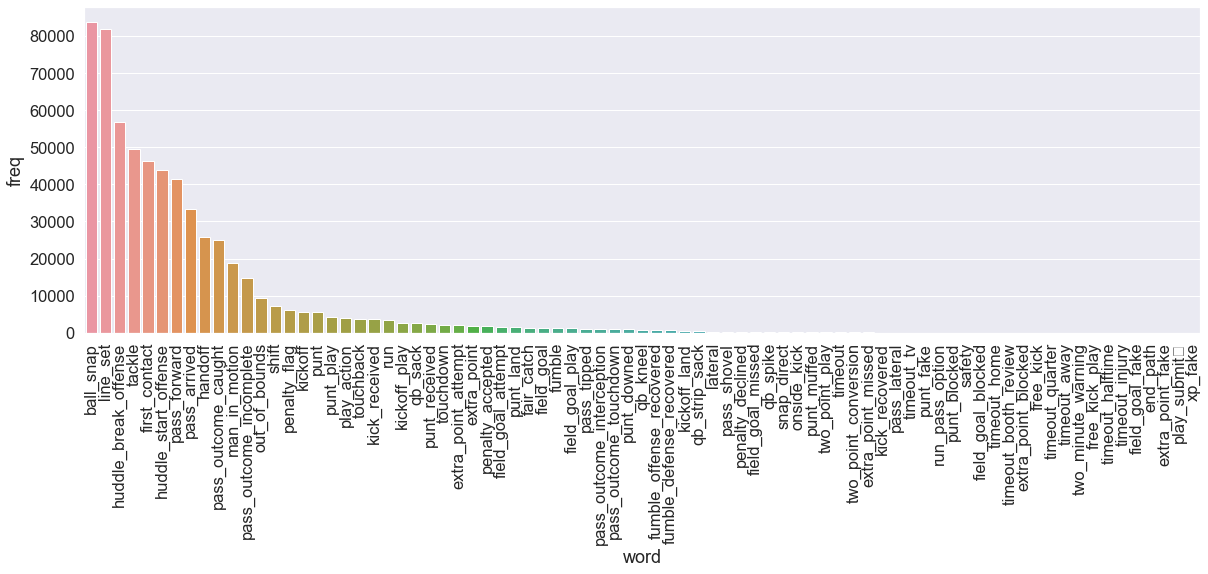

In [145]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.figure(figsize = (20, 6))
word_freq_plot = sns.barplot(data = wordFreq_df, x = "word", y = "freq")
word_freq_plot.set_xticklabels(word_freq_plot.get_xticklabels(), rotation=90)
plt.show()

In [53]:
raw_corpus = playkey_session_df.session.values
total_corpus = []
for single_list in raw_corpus:
    sent = ' '.join(single_list)
    total_corpus.append(sent)
len(total_corpus)

89735

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(total_corpus) 
word = vectorizer.get_feature_names() 

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer  

transformer = TfidfTransformer() 
tfidf = transformer.fit_transform(X)  
print (tfidf.toarray().shape)  

(89735, 79)


In [56]:
tfidf_df = pd.DataFrame(tfidf.toarray(), columns = word)
tfidf_df['PlayKey'] = playkey_session_df['PlayKey']

In [57]:
train_df = train_df.merge(tfidf_df.reset_index(), on=['PlayKey'], how="left")

In [58]:
train_df_syn = train_df[train_df['FieldType'] == 'Synthetic']
train_df_nat = train_df[train_df['FieldType'] == 'Natural']

In [207]:
dense_cols = ['PlayerDay',
     'speed_max', 'angle_max', 'speed_avg', 'angle_avg',
    'Temperature', 'ball_snap', 'end_path', 'extra_point', 'extra_point_attempt', 'extra_point_blocked', 'extra_point_fake', 'extra_point_missed', 
    'fair_catch', 'field_goal', 'field_goal_attempt', 'field_goal_blocked', 'field_goal_fake', 'field_goal_missed', 'field_goal_play', 'first_contact',
    'free_kick', 'free_kick_play', 'fumble', 'fumble_defense_recovered', 'fumble_offense_recovered', 'handoff', 
     'kick_received', 'kick_recovered', 'kickoff', 'kickoff_land', 'kickoff_play', 'lateral', 
    'man_in_motion', 'onside_kick', 'out_of_bounds', 'pass_arrived', 'pass_forward', 'pass_lateral', 'pass_outcome_caught', 'pass_outcome_incomplete', 
    'pass_outcome_interception', 'pass_outcome_touchdown', 'pass_shovel', 'pass_tipped', 'penalty_accepted', 'penalty_declined', 'penalty_flag', 
    'play_action', 'play_submit', 'punt', 'punt_blocked', 'punt_downed', 'punt_fake', 'punt_land', 'punt_muffed', 'punt_play', 'punt_received', 
    'qb_kneel', 'qb_sack', 'qb_spike', 'qb_strip_sack', 'run', 'run_pass_option', 'safety', 'shift', 'snap_direct', 'tackle', 'timeout', 'timeout_away',
    'timeout_booth_review', 'timeout_halftime', 'timeout_home', 'timeout_injury', 'timeout_quarter', 'timeout_tv', 'touchback', 'touchdown', 
    'two_minute_warning', 'two_point_conversion', 'two_point_play', 'xp_fake'
]

# dense_cols = ['PlayerDay',
#      'speed_max', 'angle_max', 'speed_avg', 
#      'end_path', 'extra_point', 'extra_point_attempt', 'extra_point_blocked', 'extra_point_fake', 'extra_point_missed', 
#     'fair_catch', 'field_goal', 'field_goal_attempt', 'field_goal_blocked', 'field_goal_fake', 'field_goal_missed', 'field_goal_play', 'first_contact',
#     'free_kick', 'free_kick_play', 'fumble', 'fumble_defense_recovered', 'fumble_offense_recovered', 'handoff', 
#      'kick_received', 'kick_recovered', 'kickoff', 'kickoff_land', 'kickoff_play', 'lateral', 
#     'man_in_motion', 'onside_kick', 'out_of_bounds', 'pass_arrived', 'pass_forward', 'pass_lateral', 'pass_outcome_caught', 'pass_outcome_incomplete', 
#     'pass_outcome_interception', 'pass_outcome_touchdown', 'pass_shovel', 'pass_tipped', 'penalty_accepted', 'penalty_declined', 'penalty_flag', 
#     'play_action', 'play_submit', 'punt', 'punt_blocked', 'punt_downed', 'punt_fake', 'punt_land', 'punt_muffed', 'punt_play', 'punt_received', 
#     'qb_kneel', 'qb_sack', 'qb_spike', 'qb_strip_sack', 'run', 'run_pass_option', 'safety', 'shift', 'snap_direct', 'tackle', 'timeout', 'timeout_away',
#     'timeout_booth_review', 'timeout_halftime', 'timeout_home', 'timeout_injury', 'timeout_quarter', 'timeout_tv', 'touchback', 'touchdown', 
#     'two_minute_warning', 'two_point_conversion', 'two_point_play', 'xp_fake'
# ]

# dense_cols = [
#      'end_path', 'extra_point', 'extra_point_attempt', 'extra_point_blocked', 'extra_point_fake', 'extra_point_missed', 
#     'fair_catch', 'field_goal', 'field_goal_attempt', 'field_goal_blocked', 'field_goal_fake', 'field_goal_missed', 'field_goal_play', 'first_contact',
#     'free_kick', 'free_kick_play', 'fumble', 'fumble_defense_recovered', 'fumble_offense_recovered', 'handoff', 
#      'kick_received', 'kick_recovered', 'kickoff', 'kickoff_land', 'kickoff_play', 'lateral', 
#     'man_in_motion', 'onside_kick', 'out_of_bounds', 'pass_arrived', 'pass_forward', 'pass_lateral', 'pass_outcome_caught', 'pass_outcome_incomplete', 
#     'pass_outcome_interception', 'pass_outcome_touchdown', 'pass_shovel', 'pass_tipped', 'penalty_accepted', 'penalty_declined', 'penalty_flag', 
#     'play_action', 'play_submit', 'punt', 'punt_blocked', 'punt_downed', 'punt_fake', 'punt_land', 'punt_muffed', 'punt_play', 'punt_received', 
#     'qb_kneel', 'qb_sack', 'qb_spike', 'qb_strip_sack', 'run', 'run_pass_option', 'safety', 'shift', 'snap_direct', 'tackle', 'timeout', 'timeout_away',
#     'timeout_booth_review', 'timeout_halftime', 'timeout_home', 'timeout_injury', 'timeout_quarter', 'timeout_tv', 'touchback', 'touchdown', 
#     'two_minute_warning', 'two_point_conversion', 'two_point_play', 'xp_fake'
# ]
len(dense_cols)

82

In [208]:
# cate_cols =['StadiumType', 'FieldType', 'Weather', 'PlayType', 'Position',]
cate_cols =['FieldType', 'PlayType', 'Position',]

### Synthetic

In [209]:
y_syn = train_df_syn['if_injury']

In [210]:
train_df_syn['if_injury'].value_counts()

0    38968
1       40
Name: if_injury, dtype: int64

In [211]:
cate_feat_syn = pd.get_dummies(train_df_syn[cate_cols])

dense_feat_syn = train_df_syn[dense_cols]
dense_feat_syn = dense_feat_syn.replace([np.inf, -np.inf], 0)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
dense_feat_syn = scaler.fit_transform(dense_feat_syn.values)

In [212]:
cate_feat_arr_syn = cate_feat_syn.to_numpy()

In [213]:
final_train_arr_syn = np.concatenate((cate_feat_arr_syn, dense_feat_syn), axis=1)
final_train_arr_syn.shape, y_syn.shape

((39008, 109), (39008,))

In [214]:
weight_ratio = float(list(y_syn).count(1)/list(y_syn).count(0))
w_array = np.array([1]*y_syn.shape[0])
w_array = [1- weight_ratio if ele == 1 else weight_ratio for ele in y_syn]

In [215]:
from xgboost import XGBClassifier
xgbc_syn = XGBClassifier()
xgbc_syn.fit(final_train_arr_syn, y_syn, sample_weight=w_array)
print(xgbc_syn.score(final_train_arr_syn, y_syn))
y_pred_proba_syn = xgbc_syn.predict_proba(final_train_arr_syn)
y_pred_syn = xgbc_syn.predict(final_train_arr_syn)
conf_mat_syn = confusion_matrix(y_syn, y_pred_syn)
print(conf_mat_syn)
print(classification_report(y_syn, y_pred_syn))

0.8332393355209188
[[32463  6505]
 [    0    40]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     38968
           1       0.01      1.00      0.01        40

    accuracy                           0.83     39008
   macro avg       0.50      0.92      0.46     39008
weighted avg       1.00      0.83      0.91     39008



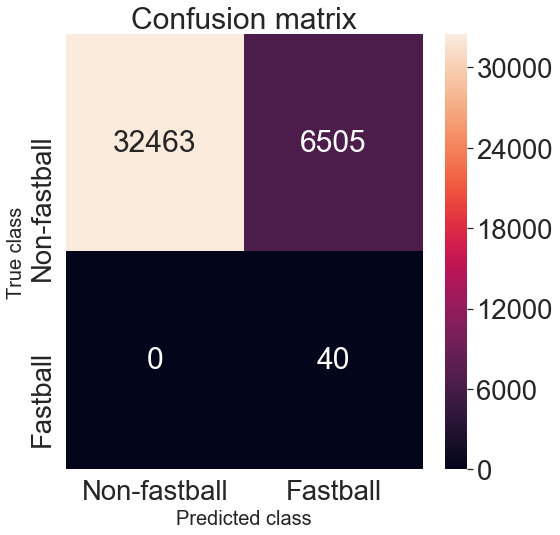

In [216]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_syn, y_pred_syn)
plt.figure(figsize=(8, 8))
sns.set(font_scale = 2.5)
g = sns.heatmap(conf_matrix, xticklabels=['Non-fastball', 'Fastball'], yticklabels=['Non-fastball', 'Fastball'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontsize=20)
plt.xlabel('Predicted class', fontsize=20)
plt.show()

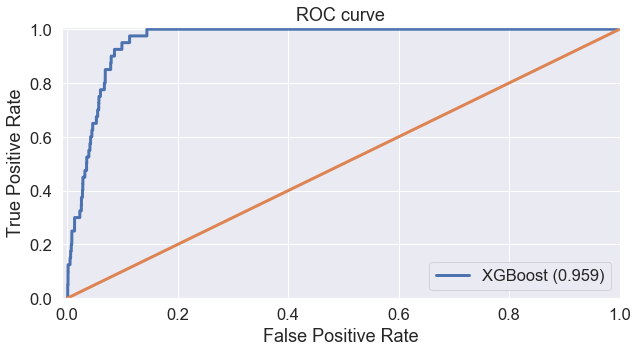

In [217]:
y_pred_proba_pos_syn = [ele[1] for ele in y_pred_proba_syn]

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline

myfont = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc', size = 14)
sns.set(font=myfont.get_name())

from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.gcf().set_size_inches(10, 5)
sns.set(font_scale = 1.5)

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_syn, y_pred_proba_pos_syn)

roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='XGBoost (%0.3f)'% roc_auc)

plt.plot([0,1],[0,1], linewidth=3)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

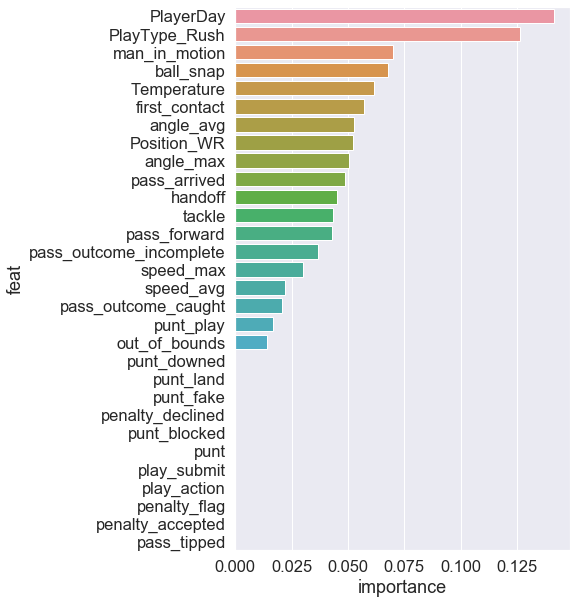

In [218]:
feature_importance_dict = dict()
importance_arr = xgbc_syn.feature_importances_
for i, col in enumerate(list(cate_feat_syn.columns)+dense_cols):
    feature_importance_dict[col] = importance_arr[i]

importance_df = pd.DataFrame()
importance_df['feat'] = pd.Series(list(feature_importance_dict.keys())).values
importance_df['importance'] = pd.Series(list(feature_importance_dict.values())).values

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.figure(figsize = (6, 10))
sns.barplot(data = importance_df.sort_values(by = "importance", ascending = False).head(30), x = "importance", y = "feat")
plt.show()

In [219]:
X_shap_syn = pd.DataFrame(final_train_arr_syn, columns=list(cate_feat_syn.columns)+dense_cols)

In [220]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgbc_syn)
shap_values = explainer.shap_values(X_shap_syn)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_shap_syn.iloc[0,:])

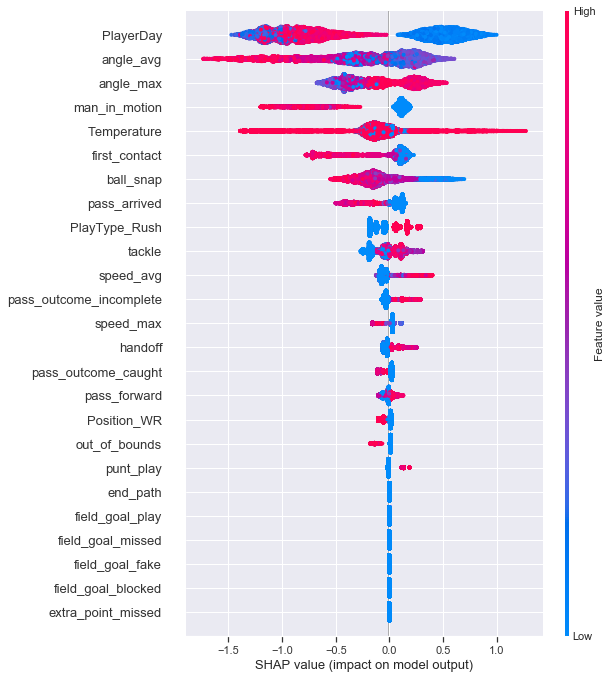

In [221]:
shap.summary_plot(shap_values, X_shap_syn, max_display=25)

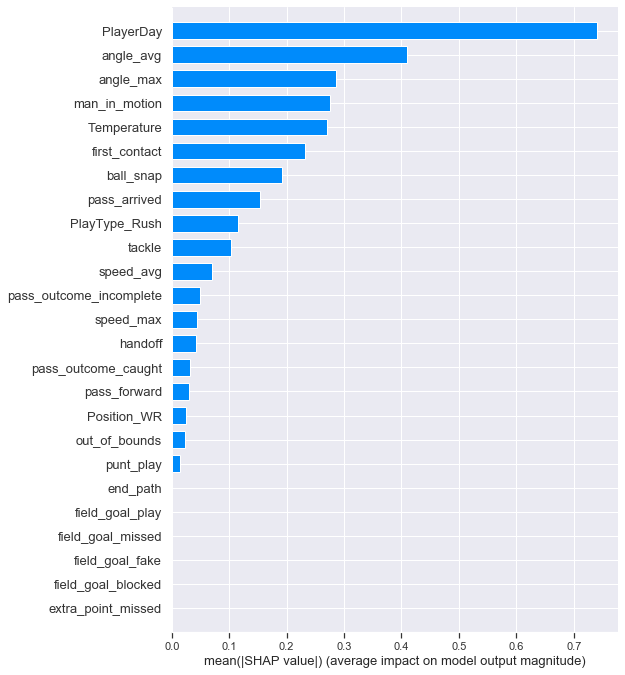

In [222]:
shap.summary_plot(shap_values, X_shap_syn, plot_type="bar", max_display=25)

### Natural

In [223]:
y_nat = train_df_nat['if_injury']
train_df_nat['if_injury'].value_counts()

0    50691
1       36
Name: if_injury, dtype: int64

In [224]:
cate_feat_nat = pd.get_dummies(train_df_nat[cate_cols])

In [225]:
dense_feat_nat = train_df_nat[dense_cols]
dense_feat_nat = dense_feat_nat.replace([np.inf, -np.inf], 0)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
dense_feat_nat = scaler.fit_transform(dense_feat_nat.values)

In [226]:
cate_feat_arr_nat = cate_feat_nat.to_numpy()

In [227]:
final_train_arr_nat = np.concatenate((cate_feat_arr_nat, dense_feat_nat), axis=1)
final_train_arr_nat.shape, y_nat.shape

((50727, 110), (50727,))

In [228]:
weight_ratio = float(list(y_nat).count(1)/list(y_nat).count(0))
w_array = np.array([1]*y_nat.shape[0])
w_array = [1- weight_ratio if ele == 1 else weight_ratio for ele in y_nat]

In [229]:
from xgboost import XGBClassifier
xgbc_nat = XGBClassifier()
xgbc_nat.fit(final_train_arr_nat, y_nat, sample_weight=w_array)
print(xgbc_nat.score(final_train_arr_nat, y_nat))
y_pred_proba_nat = xgbc_nat.predict_proba(final_train_arr_nat)
y_pred_nat = xgbc_nat.predict(final_train_arr_nat)
conf_mat_nat = confusion_matrix(y_nat, y_pred_nat)
print(conf_mat_nat)
print(classification_report(y_nat, y_pred_nat))

0.8761014844165829
[[44407  6284]
 [    1    35]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     50691
           1       0.01      0.97      0.01        36

    accuracy                           0.88     50727
   macro avg       0.50      0.92      0.47     50727
weighted avg       1.00      0.88      0.93     50727



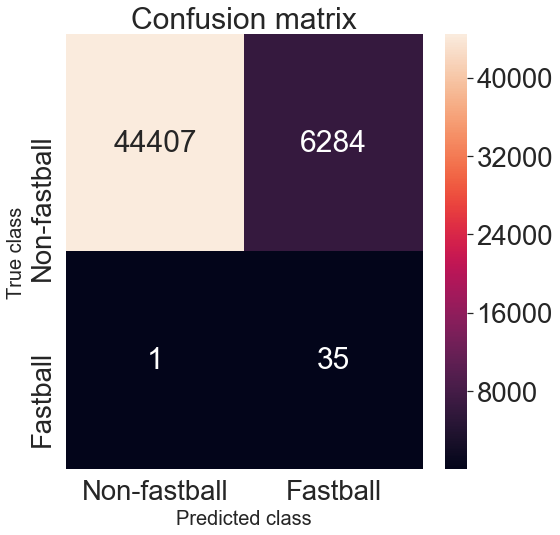

In [230]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_nat, y_pred_nat)
plt.figure(figsize=(8, 8))
sns.set(font_scale = 2.5)
g = sns.heatmap(conf_matrix, xticklabels=['Non-fastball', 'Fastball'], yticklabels=['Non-fastball', 'Fastball'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontsize=20)
plt.xlabel('Predicted class', fontsize=20)
plt.show()

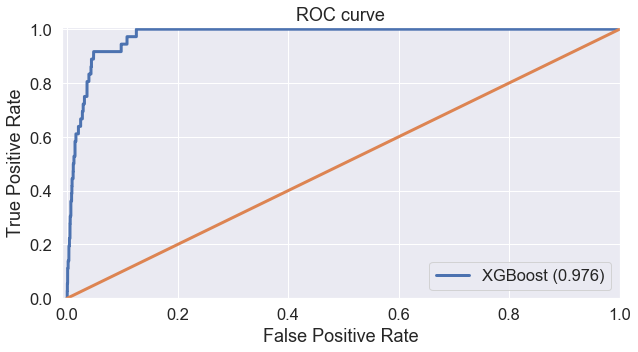

In [231]:
y_pred_proba_pos_nat = [ele[1] for ele in y_pred_proba_nat]

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline

myfont = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc', size = 14)
sns.set(font=myfont.get_name())

from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.gcf().set_size_inches(10, 5)
sns.set(font_scale = 1.5)

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_nat, y_pred_proba_pos_nat)

roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='XGBoost (%0.3f)'% roc_auc)

plt.plot([0,1],[0,1], linewidth=3)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

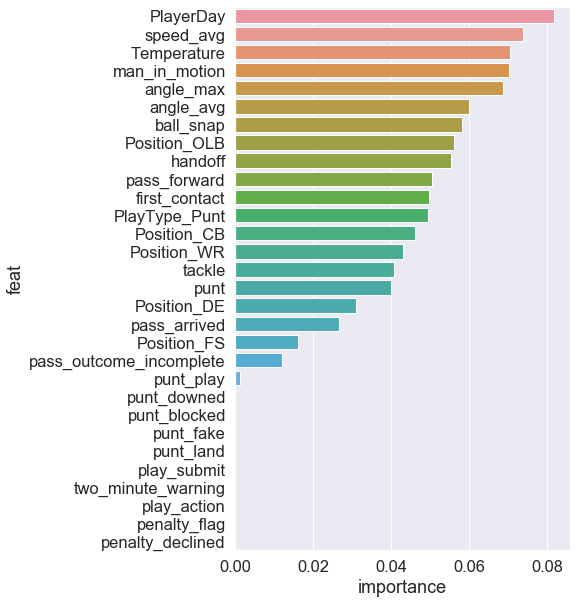

In [232]:
feature_importance_dict = dict()
importance_arr = xgbc_nat.feature_importances_
for i, col in enumerate(list(cate_feat_nat.columns)+dense_cols):
    feature_importance_dict[col] = importance_arr[i]

importance_df = pd.DataFrame()
importance_df['feat'] = pd.Series(list(feature_importance_dict.keys())).values
importance_df['importance'] = pd.Series(list(feature_importance_dict.values())).values

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.figure(figsize = (6, 10))
sns.barplot(data = importance_df.sort_values(by = "importance", ascending = False).head(30), x = "importance", y = "feat")
plt.show()

In [233]:
X_shap_nat = pd.DataFrame(final_train_arr_nat, columns=list(cate_feat_nat.columns)+dense_cols)

In [234]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgbc_nat)
shap_values = explainer.shap_values(X_shap_nat)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_shap_nat.iloc[0,:])

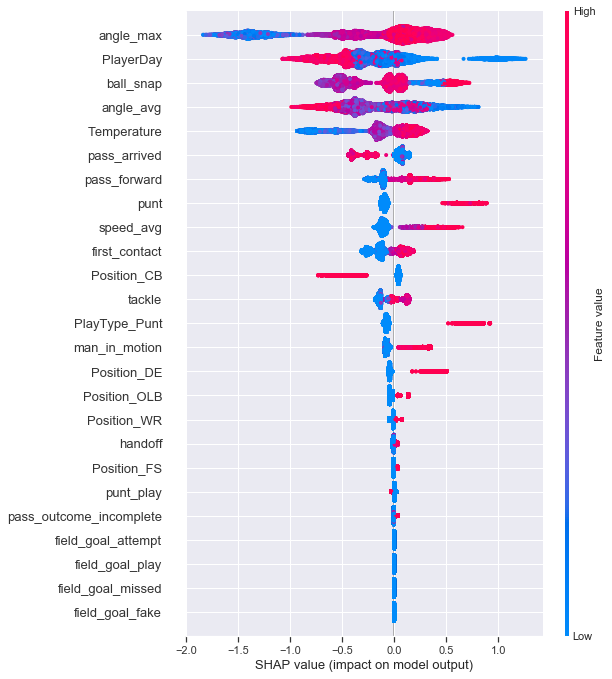

In [235]:
shap.summary_plot(shap_values, X_shap_nat, max_display=25)

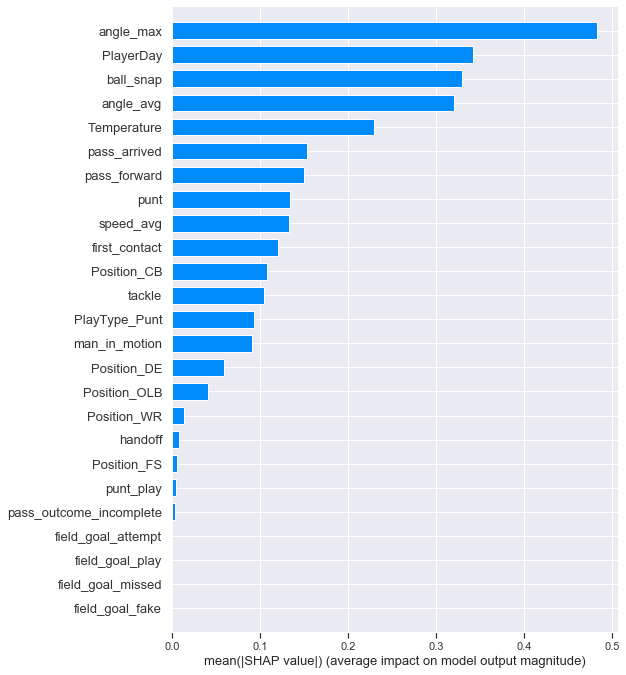

In [236]:
shap.summary_plot(shap_values, X_shap_nat, plot_type="bar", max_display=25)